In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"syamsmh","key":"e0ed70b469a6f56dae0297fca8f9833e"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [28]:
!kaggle datasets download -d elakiricoder/gender-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset
License(s): CC0-1.0
  0% 0.00/19.0k [00:00<?, ?B/s]
100% 19.0k/19.0k [00:00<00:00, 33.5MB/s]


In [29]:
!unzip gender-classification-dataset.zip -d gender-classification-dataset
!ls gender-classification-dataset

Archive:  gender-classification-dataset.zip
  inflating: gender-classification-dataset/gender_classification_v7.csv  
gender_classification_v7.csv


In [30]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

In [31]:
df = pd.read_csv("/content/gender-classification-dataset/gender_classification_v7.csv")

In [32]:
df.head()

long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0          1               11.8                 6.1          1          0   
1          0               14.0                 5.4          0          0   
2          0               11.8                 6.3          1          1   
3          0               14.4                 6.1          0          1   
4          1               13.5                 5.9          0          0   

   lips_thin  distance_nose_to_lip_long  gender  
0          1                          1    Male  
1          1                          0  Female  
2          1                          1    Male  
3          1                          1    Male  
4          0                          0  Female

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [34]:
X = df.drop("gender",axis=1)
Y = pd.get_dummies(df['gender'])

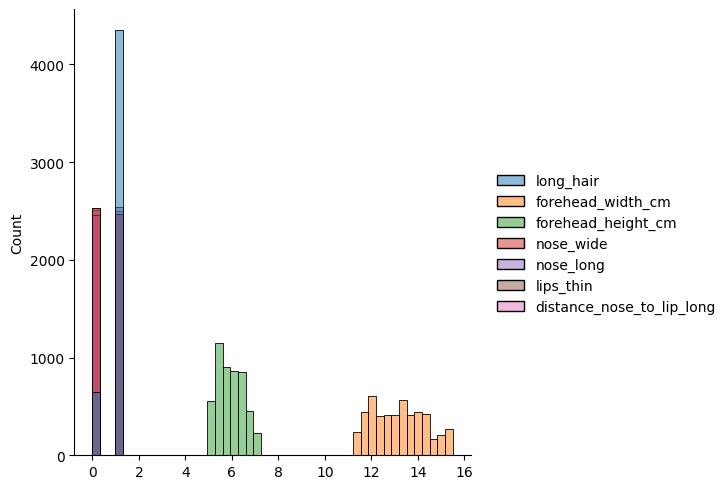

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(data=df)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [46]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of Y_train is: {Y_train.shape}\n")
print(f"Shape of X_test is: {X_test.shape}")
print(f"Shape of Y_test is: {Y_test.shape}")

Shape of X_train is: (3750, 7)
Shape of Y_train is: (3750, 2)

Shape of X_test is: (1251, 7)
Shape of Y_test is: (1251, 2)


In [47]:
input_dim = X.shape[1]

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Concatenate
model = Sequential()
model.add(Dense(8, input_dim = input_dim, kernel_initializer='normal', activation='relu'))
model.add(Dense(5, activation = "relu", kernel_initializer='normal'))
model.add(Dense(2, activation = 'sigmoid'))

In [49]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 64        
                                                                 
 dense_4 (Dense)             (None, 5)                 45        
                                                                 
 dense_5 (Dense)             (None, 2)                 12        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
result = model.fit(X_train, Y_train, epochs = 15, batch_size = 10)

Epoch 1/15
375/375 [==============================] - 1s 2ms/step - loss: 0.6144 - accuracy: 0.7813
Epoch 2/15
375/375 [==============================] - 1s 2ms/step - loss: 0.2344 - accuracy: 0.9485
Epoch 3/15
375/375 [==============================] - 1s 2ms/step - loss: 0.1234 - accuracy: 0.9501
Epoch 4/15
375/375 [==============================] - 1s 3ms/step - loss: 0.1079 - accuracy: 0.9531
Epoch 5/15
375/375 [==============================] - 1s 3ms/step - loss: 0.1036 - accuracy: 0.9477
Epoch 6/15
375/375 [==============================] - 1s 3ms/step - loss: 0.1019 - accuracy: 0.9504
Epoch 7/15
375/375 [==============================] - 1s 2ms/step - loss: 0.1009 - accuracy: 0.9544
Epoch 8/15
375/375 [==============================] - 1s 2ms/step - loss: 0.1004 - accuracy: 0.9507
Epoch 9/15
375/375 [==============================] - 1s 2ms/step - loss: 0.0998 - accuracy: 0.9483
Epoch 10/15
375/375 [==============================] - 1s 3ms/step - loss: 0.1004 - accuracy: 0.9491

In [52]:
y_pred =model.predict(X_test)
y_pred = (y_pred>0.5)

40/40 [==============================] - 0s 2ms/step


In [53]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9544364508393285


In [55]:
model.save('./gender.h5')

In [56]:
model = tf.keras.models.load_model('./gender.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("./gender.tflite", "wb").write(tflite_model)

2580